# Debugging whether or not the simulation includes the rear blocker
## @Milo
## January, 2018

#### The already "inclusion" of the Front blocker might be an effect of the way as the rays are generated since they are randomly created using the pupil af the FOXSI module as a key parameter (cross-section). The pupil already includes the front blocker. The rear blocker is removed in lines 105 and 106 of module.py

# Creating Rays

In [26]:
import numpy as np
from foxsisim.source import Source
from foxsisim.module import Module
Sdist = -1.5e13         ## cm
offaxisAngle = 0.0     ## arcmin
source = Source(type='point',center=[0, -Sdist * np.sin(np.deg2rad(offaxisAngle / 60.0)), Sdist ])
#module = Module(radii = [5.151,4.9,4.659,4.429,4.21,4.0,3.799,3.59,3.38,3.17],
#                core_radius=(2.8,3.4))
module = Module(radii = [3.17],
                core_radius=(3.,.7))
n = 10
rays = source.generateRays(module.targetFront,n)
module.passRays(rays)
Rrays = [ray for ray in rays if (ray.tag != 'Source')] #kills the passthrough rays
from foxsisim.util import save_rays, load_rays
save_rays(Rrays,filename='../../../../Desktop/30rays_test.csv')
print(len(Rrays),' rays saved')
print('Done!')

Rays saved in file : ../../../../Desktop/30rays_test.csv
10  rays saved
Done!


In [27]:
for ray in rays:
    print(ray.tag)

Source-Pa-Hy
Source-Hy
Source-Hy
Source-Pa-Hy
Source-Hy
Source-Pa-Hy
Source-Hy
Source-Pa-Hy
Source-Hy
Source-Pa-Hy


In [28]:
from foxsisim.util import load_rays
# Loading Rays:
Brays = load_rays('/Users/Kamilobu/Desktop/30rays_test.csv')
print('Number of rays : {:d}'.format(len(Brays)))

# Create detector:
from foxsisim.detector import Detector
detector = Detector(width=10,
                    height=10,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])

# Fix little bug in rays:
for ray in Brays:
    ray.hist = ray.hist.tolist()

# Detector Catch rays:
detector.catchRays(Brays)

Rays from /Users/Kamilobu/Desktop/30rays_test.csv loaded.
Number of rays : 10


In [29]:
Drays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==2 )]
Srays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 )]
Hrays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
Prays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]

#sim_scale = 1.0    # 1cm = 17.4 arcmin
sim_scale = 17.4    # 1cm = 17.4 arcmin

#Hyperboloid
Hx, Hy = [], []
for ray in Hrays:
    Hx.append(ray.pos[0]*sim_scale)
    Hy.append(ray.pos[1]*sim_scale)

# Paraboloid
Px, Py = [], []
for ray in Prays:
    Px.append(ray.pos[0]*sim_scale)
    Py.append(ray.pos[1]*sim_scale)

# Double
Dx, Dy = [], []
for ray in Drays:
    Dx.append(ray.pos[0]*sim_scale)
    Dy.append(ray.pos[1]*sim_scale)
    

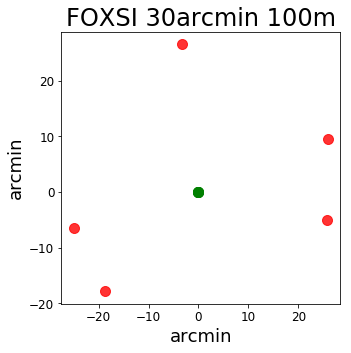

In [30]:
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(5,5))
plt.title('FOXSI 30arcmin 100m',fontsize=24)
plt.xlabel('arcmin',fontsize=18)
plt.ylabel('arcmin',fontsize=18)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.scatter(Hx,Hy,color='red',s=100.,alpha=0.8)
plt.scatter(Px,Py,color='blue',s=100.,alpha=0.8)
plt.scatter(Dx,Dy,color='green',s=100.,alpha=0.8)
#plt.ylim(-2.5,0.5)
#plt.xlim(-2.,2.)
plt.show()

In [31]:
print('Initial rays: {:d} '.format(len(Brays)))
print('Number of Double rays: {:d} '.format(len(Drays)))
print('Number of Hyperb rays: {:d} '.format(len(Hrays)))
print('Number of Parabo rays: {:d} '.format(len(Prays)))

Initial rays: 10 
Number of Double rays: 5 
Number of Hyperb rays: 5 
Number of Parabo rays: 0 
